# Meshing and Connectivity for FEM in 2D

Copyright (C) 2010-2020 Luke Olson<br>
Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [7]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sparse

import matplotlib.pyplot as plt

## Mesh the Domain

This uses [meshpy](https://documen.tician.de/meshpy/), which under the hood uses [Triangle](https://www.cs.cmu.edu/~quake/triangle.html).

`pip install meshpy` to install.

NB: Triangle is *not* open-source software. If you are looking for a quality mesher that is open-source (but a bit more complex to use), look at [Gmsh](http://gmsh.info/).

In [4]:
import meshpy.triangle as triangle

def round_trip_connect(start, end):
    return [(i, i+1) for i in range(start, end)] + [(end, start)]

def make_mesh():
    points = [(-1, -1), (1, -1), (1, 1), (-1, 1)]
    facets = round_trip_connect(0, len(points)-1)

    circ_start = len(points)
    points.extend(
            (0.25 * np.cos(angle), 0.25 * np.sin(angle))
            for angle in np.linspace(0, 2*np.pi, 30, endpoint=False))

    facets.extend(round_trip_connect(circ_start, len(points)-1))

    def needs_refinement(vertices, area):
        bary = np.sum(np.array(vertices), axis=0)/3
        max_area = 0.01 + la.norm(bary, np.inf)*0.01
        return bool(area > max_area)

    info = triangle.MeshInfo()
    info.set_points(points)
    info.set_facets(facets)

    built_mesh = triangle.build(info, refinement_func=needs_refinement)
    return np.array(built_mesh.points), np.array(built_mesh.elements)

V, E = make_mesh()

In [5]:
nv = len(V)
ne = len(E)
print(V.shape)
print(E.shape)
print(E.max())
X, Y = V[:, 0], V[:, 1]

(237, 2)
(438, 3)
236


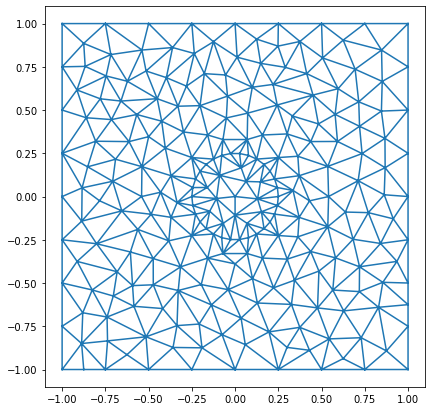

In [8]:
plt.figure(figsize=(7,7))
plt.gca().set_aspect("equal")
plt.triplot(X, Y, E)

## Explore Connectivity

Compute the vertex-to-edge connections as `V2E`.

In [ ]:
print('V shape: ', V.shape)
print('E shape: ', E.shape)

In [10]:
element_ids = np.empty((ne, 3), dtype=np.intp)
element_ids[:] = np.arange(ne).reshape(-1, 1)

V2E = sparse.coo_matrix(
    (np.ones((ne*3,), dtype=np.intp), 
     (E.ravel(), 
      element_ids.ravel(),)))
print('V2E shape: ', V2E.shape)

V2E shape:  (237, 438)


Compute

- the element-to-element connections `E2E`, and
- the vertex-to-vertex connections `V2V`.

In [12]:
#clear
E2E = V2E.T @ V2E
V2V = V2E @ V2E.T

In [13]:
print('V2V shape: ', V2V.shape)
print('E2E shape: ', E2E.shape)

V2V shape:  (237, 237)
E2E shape:  (438, 438)


Plot the vertex degrees.

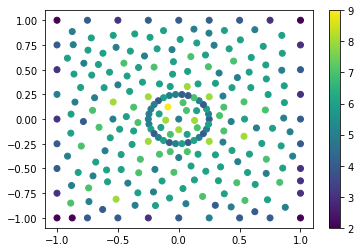

In [14]:
plt.scatter(X, Y, c=V2V.diagonal(), clip_on=False)
plt.colorbar()
plt.show()

Explain this:

In [15]:
E2E.diagonal()

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

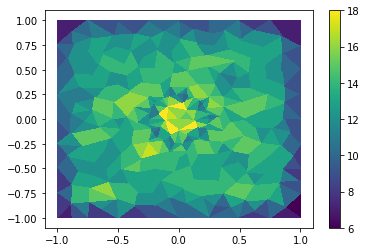

In [16]:
E2E.data[:] = 1
num_neighbors = np.array(E2E.sum(axis=0)).ravel()
plt.tripcolor(X, Y, triangles=E, facecolors=num_neighbors)
plt.colorbar()
plt.show()